In [1]:
import pandas as pd

In [3]:
#importing the training data
imdb_data=pd.read_csv('IMDB dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [9]:
#Summary of the dataset
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [10]:
#sentiment count
imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from textblob import TextBlob
from sklearn.metrics import accuracy_score, classification_report
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the IMDb dataset from a CSV file
df = pd.read_csv('IMDB Dataset.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Create a CountVectorizer or TfidfVectorizer to convert text data into numerical features
vectorizer = CountVectorizer(max_df=0.85, min_df=0.01, stop_words='english')
# vectorizer = TfidfVectorizer(max_df=0.85, min_df=0.01, stop_words='english')  # You can also use TF-IDF

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators
rf_classifier.fit(X_train_vectorized, y_train)
y_pred_rf = rf_classifier.predict(X_test_vectorized)

# Evaluate the Random Forest Classifier
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Define a function for sentiment analysis using TextBlob
def analyze_sentiment_with_textblob(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return "positive"
    elif sentiment < 0:
        return "negative"
    else:
        return "neutral"

# Apply TextBlob sentiment analysis to the IMDb dataset
y_pred_textblob = [analyze_sentiment_with_textblob(text) for text in X_test]

# Evaluate TextBlob-based sentiment analysis
print("\nTextBlob Sentiment Analysis Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_textblob))
print("Classification Report:")
print(classification_report(y_test, y_pred_textblob))

# Initialize VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate VADER sentiment scores and classify
df['VADER_Sentiment'] = df['sentiment'].apply(lambda x: analyzer.polarity_scores(x))
threshold = 0.1  # Define a threshold for VADER sentiment classification
df['VADER_Label'] = df['VADER_Sentiment'].apply(lambda x: 'positive' if x['compound'] >= threshold else 'negative' if x['compound'] <= -threshold else 'neutral')

# Evaluate VADER-based sentiment analysis
y_test_vader = df.loc[y_test.index]['VADER_Label']
print("\nVADER Sentiment Analysis Results:")
print("Accuracy:", accuracy_score(y_test, y_test_vader))
print("Classification Report:")
print(classification_report(y_test, y_test_vader))


Random Forest Classifier Results:
Accuracy: 0.8348
Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.84      0.83      4961
    positive       0.84      0.83      0.83      5039

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000


TextBlob Sentiment Analysis Results:
Accuracy: 0.6924
Classification Report:


C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.89      0.43      0.58      4961
     neutral       0.00      0.00      0.00         0
    positive       0.63      0.95      0.76      5039

    accuracy                           0.69     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.76      0.69      0.67     10000


VADER Sentiment Analysis Results:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      4961
    positive       1.00      1.00      1.00      5039

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



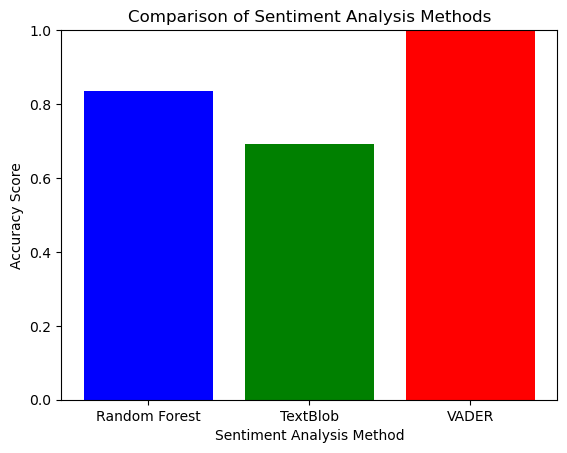

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the IMDb dataset from a CSV file
df = pd.read_csv('IMDB Dataset.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Create a CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer(max_df=0.85, min_df=0.01, stop_words='english')

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vectorized, y_train)
y_pred_rf = rf_classifier.predict(X_test_vectorized)

# Calculate Random Forest accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Define a function for sentiment analysis using TextBlob
def analyze_sentiment_with_textblob(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return "positive"
    elif sentiment < 0:
        return "negative"
    else:
        return "neutral"

# Apply TextBlob sentiment analysis to the IMDb dataset
y_pred_textblob = [analyze_sentiment_with_textblob(text) for text in X_test]

# Calculate TextBlob accuracy
textblob_accuracy = accuracy_score(y_test, y_pred_textblob)

# Initialize VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate VADER sentiment scores and classify
df['VADER_Sentiment'] = df['sentiment'].apply(lambda x: analyzer.polarity_scores(x))
threshold = 0.1  # Define a threshold for VADER sentiment classification
df['VADER_Label'] = df['VADER_Sentiment'].apply(lambda x: 'positive' if x['compound'] >= threshold else 'negative' if x['compound'] <= -threshold else 'neutral')

# Calculate VADER accuracy
y_test_vader = df.loc[y_test.index]['VADER_Label']
vader_accuracy = accuracy_score(y_test, y_test_vader)

# Create a bar plot to compare accuracy scores
methods = ['Random Forest', 'TextBlob', 'VADER']
accuracy_scores = [rf_accuracy, textblob_accuracy, vader_accuracy]

plt.bar(methods, accuracy_scores, color=['blue', 'green', 'red'])
plt.xlabel('Sentiment Analysis Method')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Sentiment Analysis Methods')
plt.ylim(0, 1.0)

# Show the bar plot
plt.show()


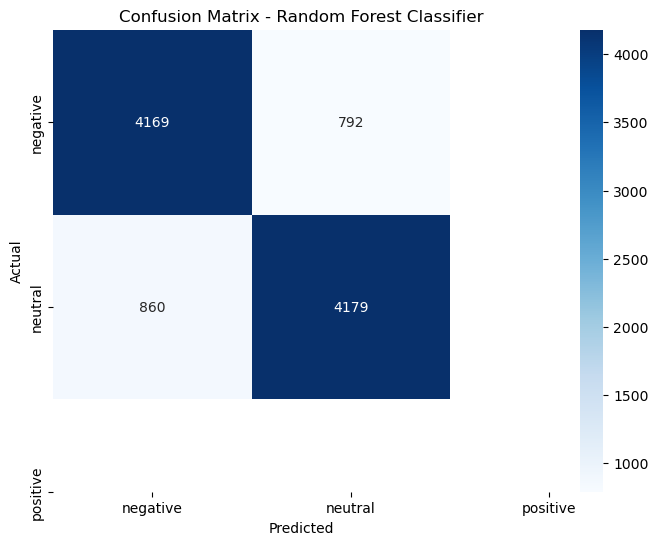

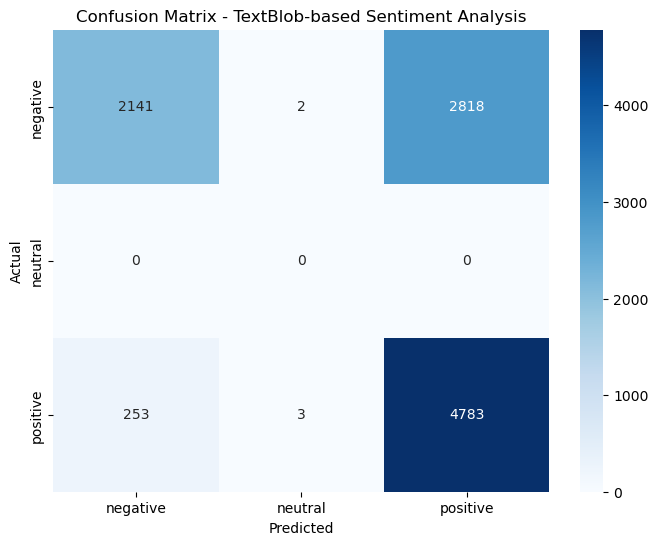

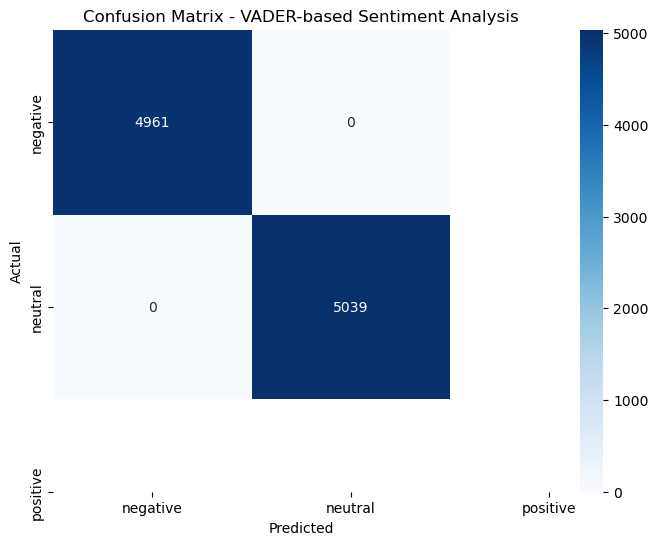

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for Random Forest Classifier
confusion_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix for Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

# Calculate the confusion matrix for TextBlob-based sentiment analysis
confusion_textblob = confusion_matrix(y_test, y_pred_textblob)

# Plot the confusion matrix for TextBlob-based sentiment analysis
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_textblob, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - TextBlob-based Sentiment Analysis')
plt.show()

# Calculate the confusion matrix for VADER-based sentiment analysis
confusion_vader = confusion_matrix(y_test, y_test_vader)

# Plot the confusion matrix for VADER-based sentiment analysis
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_vader, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - VADER-based Sentiment Analysis')
plt.show()
